# STM video analysis

This notebook will walk you through how to load and analyze STM image data with a focus on calculating dynamical quantities such as diffusion coefficient and drift velocity.  All analysis are built around <a href=https://soft-matter.github.io/trackpy/v0.4.2/>TrackPy</a>

In [ ]:
#install extra packages
!pip install trackpy pyspm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%load_ext autoreload
%autoreload 2

from sxmreader import SXMReader
from analyzer import MotionAnalyzer

First we have to choose which images we want to analyze.  For our video studies, we typically take a series of images (~15 frames) before changing either the voltage or temperature in our system.

For example, take 3 frames per temperature starting at `Image_001.sxm` for 2 temperatures 15K and 16K.  That means

15K : `Image_001.sxm`, `Image_002.sxm`, `Image_003.sxm`

16K : `Image_004.sxm`, `Image_005.sxm`, `Image_006.sxm`

When we load data into our analysis, software we just need to pass in a list of numerical ranges corresponding to the filepaths for the frames taken at a particular voltage/temperature.  Below is one such code to generate such a list.

In [2]:
voltages_temperatures = np.linspace(0.4, 0.54, 8, dtype=np.float32)
START = 395
SIZE = 15
sets = [range(START + SIZE * i, START + SIZE * (i + 1)) for i in range(len(voltages_temperatures))]
n_range = [i for i in sets]

In [15]:
# voltages_temperatures = np.linspace(15, 19, 5, dtype=np.float32)
# START = 278
# SIZE = 6
# sets = [range(START + SIZE * i, START + SIZE * (i + 1)) for i in range(len(voltages_temperatures))]
# n_range = [i for i in sets]

# print(voltages_temperatures)

Now load the data into the analyzer.  This will take the video frames and automatically detect the particles for you and link them together.

In [3]:
# Change tracking parameters in params.yml
# TODO : UI for adjusting tracker parameters and output viz
m = MotionAnalyzer(n_range, voltages_temperatures,"electromigration_23")
m

In [ ]:
m.analyze(plot_gif = False)

In [9]:
m.drifts

[              y         x
 frame                    
 1      0.095354  0.670111
 2      0.409331  1.100817
 3      0.323907  1.157900
 4      1.277189  1.372037
 5      1.722835  0.742683
 6      1.149779  1.791350
 7      0.863520  1.419752
 8      0.329182  2.240569
 9     -0.357627  1.749262
 10     0.405772  0.746046
 11     0.333826  1.531634
 12     1.206127  1.728410
 13    -0.167512  0.689775
 14    -0.736036  1.072204
 0      0.000000  0.000000,               y         x
 frame                    
 1      1.713494  0.185519
 2      2.218001  0.262876
 3      1.575278  0.087760
 4      0.705809 -0.362591
 5     -0.124154 -0.162209
 6     -2.268248 -0.872612
 7     -1.360468  0.126430
 8     -1.048160  0.206307
 9      0.952162  0.496342
 10     1.114248  0.162998
 11     0.361619  0.412562
 12     0.002846  0.163803
 13    -1.305106 -0.218059
 14    -2.167793 -0.165183
 0      0.000000  0.000000,               y         x
 frame                    
 1      1.695920 -0.240282
 

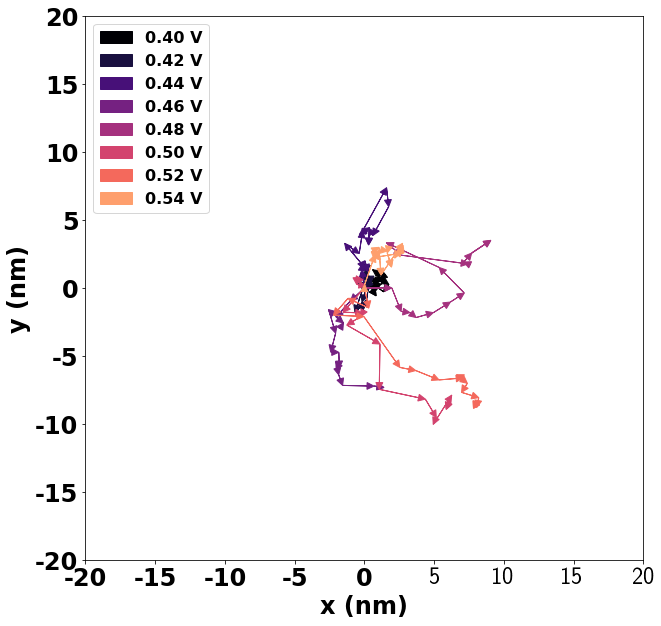

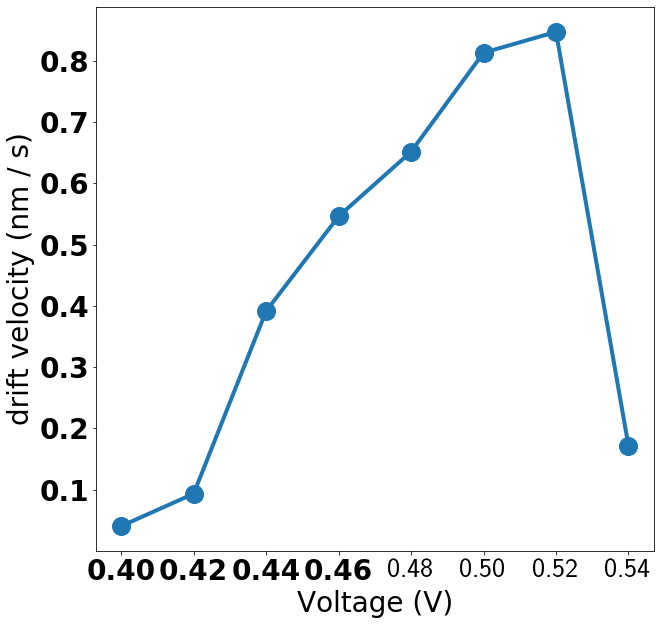

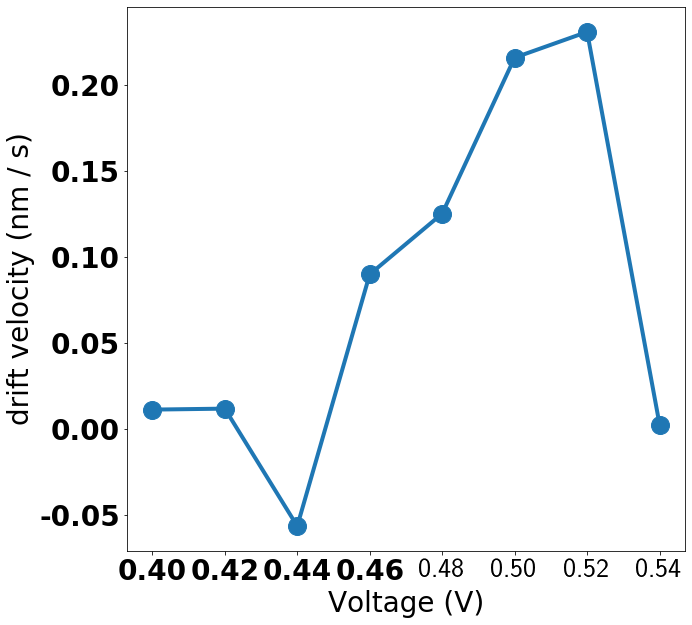

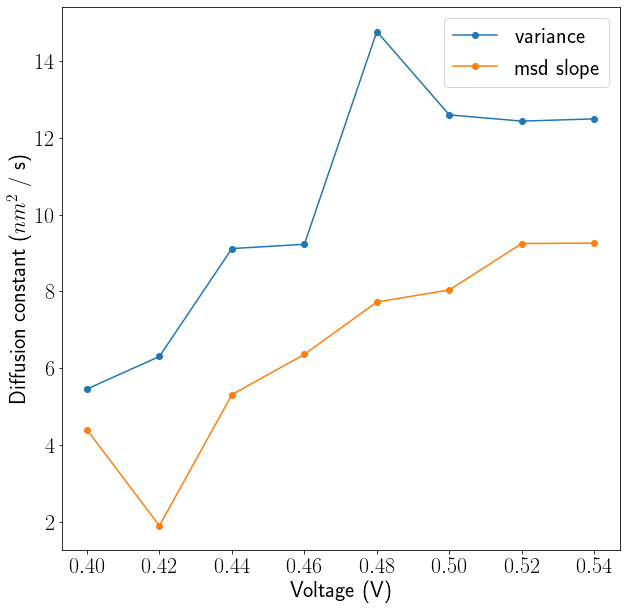

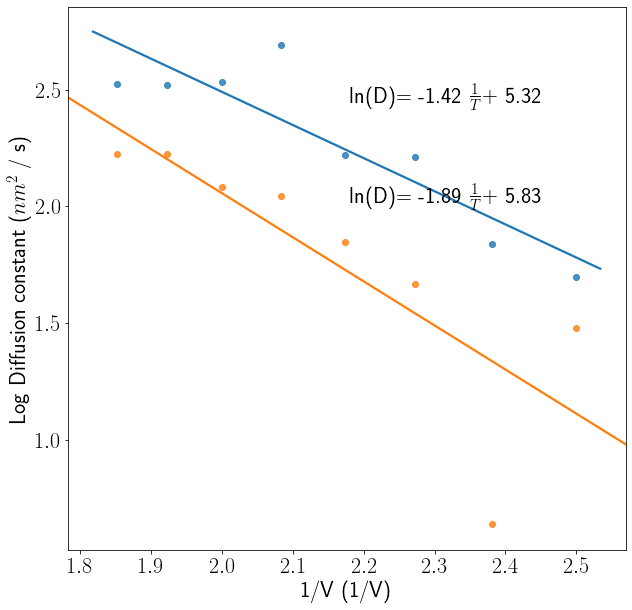

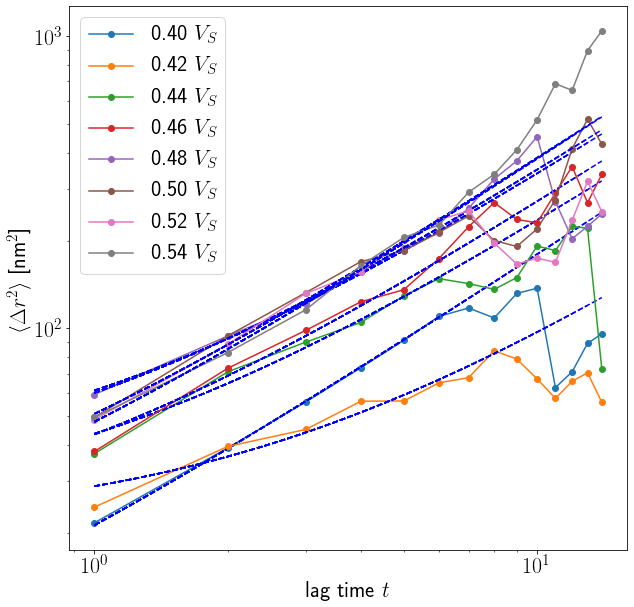

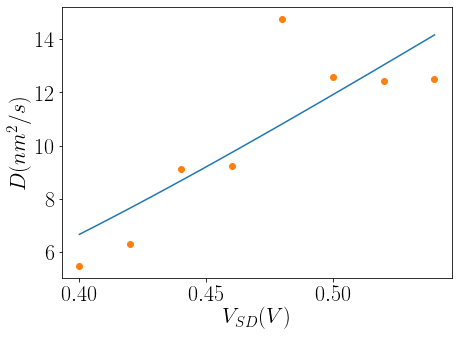

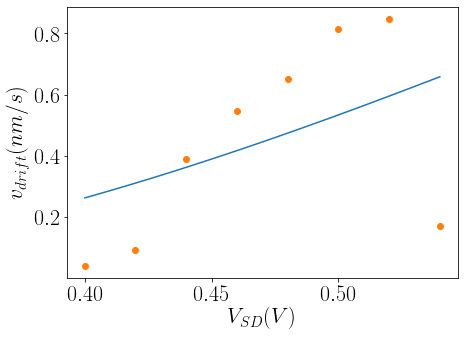

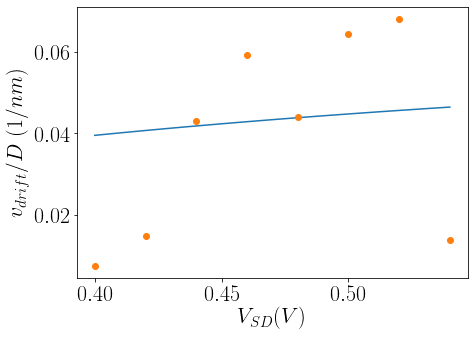

In [11]:
from diffusion_plotter import DiffusionPlotter
dp = DiffusionPlotter(m)
dp.plot_drift_data()
#dp.plot_drift_vectors(10)
dp.plot_diffusion()
dp.plot_msd()
#dp.plot_ed()
dp.plot_v_over_D()